$Step-1$

**import the required packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Data1: Here we will take the data which follows normal distribution

- Data2: Based on above data we will create a another data by multiplying some value

- so that both data sets have multicollinearity

- The both datasets have some covariance

- Then we will apply PCA

- Will create two new PCs, will check the Covariance matrix again

- So the PCs covariance should be zero

$Step-2$

**Create the data**

In [2]:
# Will create a data having some multicollinearity
x=np.random.normal(200,10,500)  # mean =200, std=10, no of observations=500
x.mean()

199.7124040649804

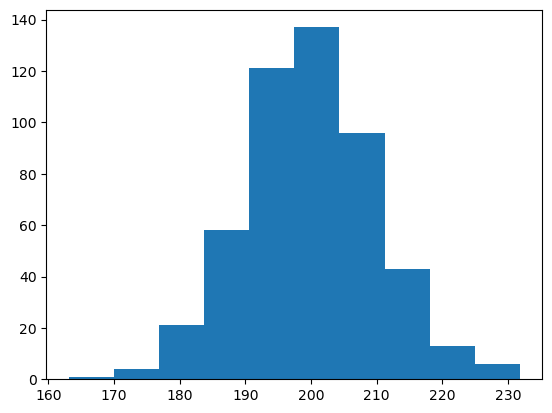

In [3]:
plt.hist(x)
plt.show()

In [4]:
# Create a data y , should be correlate to X
y=0.5*x + np.random.normal(10,5,500)
# we are taking random samples
# and we are adding x data to the samples
print("mean:",y.mean())
print("std:",y.std())

mean: 110.02927686832435
std: 6.665782642757101


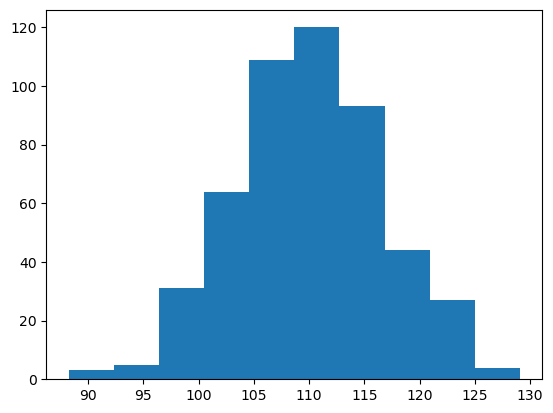

In [5]:
plt.hist(y)
plt.show()

$Step-3$

**Perform the scatter plot**

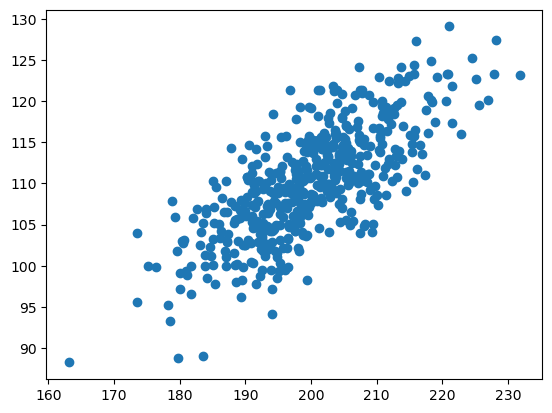

In [6]:
plt.scatter(x,y)
plt.show()

**Observations**
- Both points are correalted each other
- Both points are not orthogonal to each other
- Perform covariance matrix for better idea

$Step-4$

**Covariance matrix**

In [7]:
cov_mat=np.cov(x,y)
cov_mat

array([[101.40368133,  49.79874616],
       [ 49.79874616,  44.52170164]])

In [13]:
#import seaborn as sns
#sns.heatmap(cov_mat,annot=True)

$Step-5$

**Perform the PCA**

- to reduce the dimensions

- to avoid multi collinearity

- to make data has orthogonal

**Will calculate eigen vectors and eigen values of covariance matrix**

In [8]:
from numpy.linalg import eig
eig_values,eig_vectors=eig(cov_mat)

In [9]:
eig_vectors

array([[ 0.86485144, -0.50202788],
       [ 0.50202788,  0.86485144]])

In [10]:
eig_values

array([130.3107954 ,  15.61458758])

**Obeservations**

- We have two data samples x and y, so we have **2x2 covaraiance matrix**

- When we apply eigen values and eigen vectors on 2x2 cov matrix, will get **two eigen values and two eigen vectors**

- Eigen vectors will give the indicaton to **which direction data should flow**

- If you see eigen vectors the magnitude is same but the direction is different

- The dot product of eigen values either one or zero, indicates **orthogonality**

- Eigen value represnts how much data should flow along that particular direction

**Check point-1**

- Perform the dot product of two eigen vectors

- cos90 is zero

- we are expecting dot product of two eigen vectors is zero

- dot product means cos

- cross product means sin

- dot product : cosine similarity

In [11]:
v1=eig_vectors[0]
v2=eig_vectors[1]

In [12]:
np.dot(v1,v2)

0.0

**Check point-2**

- Data variance along each direction
  
- Percentage of data flows in each direction

- we will use eigen values , each eigen value divided by sum of the eigen values

In [13]:
eig_values

array([130.3107954 ,  15.61458758])

In [14]:
129/(129+16), 16/(129+16)

(0.8896551724137931, 0.1103448275862069)

In [15]:
print("the variance percentage:",eig_values[0]*100/sum(eig_values))
print("the variance percentage:",eig_values[1]*100/sum(eig_values))

the variance percentage: 89.29960829529841
the variance percentage: 10.700391704701572


$Step-6$

**Create a new Pc's data**

new data= old data * eigen vectors

In [16]:
z=np.vstack([x,y]).T  
# stacking means together
# Vertically stacking
# T = Transpose of the data
# X  y
z


array([[178.22631617,  95.24613859],
       [209.37088809, 119.86163912],
       [185.04549476, 103.2148978 ],
       [204.649212  , 118.08495044],
       [196.40945242, 113.23351201],
       [195.24780841, 111.55075562],
       [188.94004946, 102.9509631 ],
       [190.04039184, 106.04523932],
       [210.9046294 , 118.51337179],
       [196.84250665, 121.29857762],
       [216.06160913, 111.78002343],
       [189.33575188, 108.00638304],
       [198.31853175, 105.89731179],
       [196.55212823, 103.24307877],
       [205.31527596, 117.04973657],
       [199.60530685, 107.18909426],
       [203.39303069, 114.77195723],
       [212.69228805, 118.39502226],
       [191.00293309, 107.37442993],
       [205.28248794, 114.95268492],
       [208.11648797, 104.79600945],
       [224.52270881, 125.28252872],
       [212.33447598, 110.32162464],
       [183.51883812,  89.02096421],
       [202.90209948, 108.38428378],
       [203.80917212, 110.83826934],
       [180.50662799, 102.80343545],
 

In [17]:
eig_vectors

# [ 0.85632617, -0.51643536]
#  [188.53587425,  98.15254732]

array([[ 0.86485144, -0.50202788],
       [ 0.50202788,  0.86485144]])

In [31]:
np.dot([188.53587425,  98.15254732],[0.85632617, -0.51643536])

print(188*0.85)
print(98*0.5)
49+159

159.79999999999998
49.0


208

In [35]:
np.dot([188.53587425,  98.15254732],eig_vectors)

array([212.13765019, -13.31599782])

In [23]:
2.12137650e+02

212.13765

In [18]:
# dot product of old data and eigen vectors
new_data=np.dot(z,eig_vectors)
new_data

array([[ 2.01955503e+02, -7.10082047e+00],
       [ 2.41248598e+02, -1.44751300e+00],
       [ 2.11853618e+02, -3.63244541e+00],
       [ 2.36273102e+02, -6.13671711e-01],
       [ 2.26711377e+02, -6.72856145e-01],
       [ 2.24861937e+02, -1.54501274e+00],
       [ 2.15089327e+02, -5.81588478e+00],
       [ 2.17594373e+02, -3.69219810e+00],
       [ 2.41898189e+02, -3.38354484e+00],
       [ 2.31134792e+02,  6.08482213e+00],
       [ 2.42977881e+02, -1.17958384e+01],
       [ 2.17969513e+02, -1.64235123e+00],
       [ 2.24679470e+02, -7.97599048e+00],
       [ 2.21819294e+02, -9.38472390e+00],
       [ 2.36329443e+02, -1.84336059e+00],
       [ 2.26440850e+02, -7.50478754e+00],
       [ 2.33523477e+02, -2.84828060e+00],
       [ 2.43384833e+02, -4.38335409e+00],
       [ 2.19094119e+02, -3.02586824e+00],
       [ 2.35248307e+02, -3.64053821e+00],
       [ 2.32600362e+02, -1.38473006e+01],
       [ 2.57074110e+02, -4.36588533e+00],
       [ 2.39022308e+02, -1.11860120e+01],
       [ 2.

In [19]:
new_data=np.dot(z,eig_vectors)
new_data=pd.DataFrame(new_data, columns=['PC1','PC2'])
new_data

,PC1,PC2
0,201.955503,-7.100820
1,241.248598,-1.447513
2,211.853618,-3.632445
3,236.273102,-0.613672
4,226.711377,-0.672856
...,...,...
495,240.518915,-4.903999
496,229.630897,-11.570594
497,209.466628,-8.454738
498,231.762724,-2.550251


$Step-7$

**Check point-3:
Covariance of the new data**

In [20]:
pc1=new_data['PC1'].values
pc2=new_data['PC2'].values
np.cov(pc1,pc2)
# 7.7/(10000000000000000000000)= 0.00000000000000077

array([[ 1.30310795e+02, -2.43777387e-14],
       [-2.43777387e-14,  1.56145876e+01]])

$Step-8$

**Scatter plot of new pcs data**

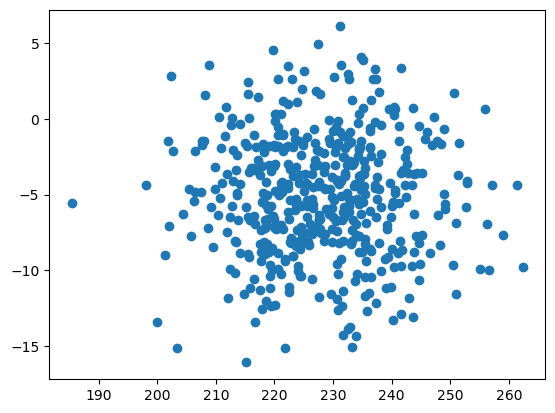

In [21]:
plt.scatter(new_data['PC1'],new_data['PC2'])
plt.show()

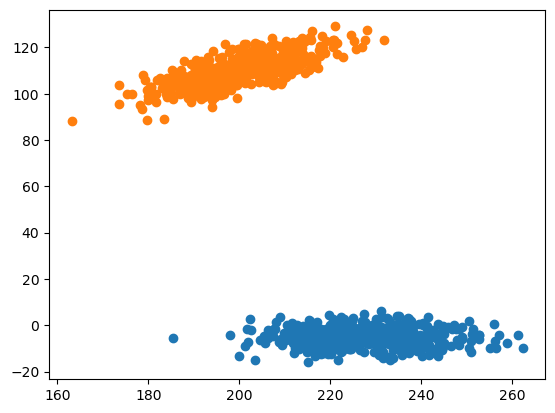

In [22]:
plt.scatter(new_data['PC1'],new_data['PC2']) # Blue no correlation
plt.scatter(x,y) # Orange # Correlation
plt.show()

**Obesrvations**

- we create a new data has two pcs

- The two pcs includes old data

- The two pcs are indepenedent each other

- The variance along PC1 is greater than PC2

- So we can choose only one component i.e. PC1

## Using Package

In [23]:
# Import the packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


In [24]:
x=np.random.normal(200,10,500)
y=0.5*x + np.random.normal(10,5,500)
z=np.vstack([x,y]).T  

In [25]:
pca=PCA(n_components=2)
pca.fit(z)

PCA(n_components=2)

In [26]:
pca.transform(z)

array([[ 7.58700479e+00,  2.27302236e+00],
       [ 1.18558834e+00, -4.90348237e+00],
       [-3.30876177e+00, -4.80099876e-01],
       [-1.58427120e+01, -2.69836228e+00],
       [-6.52047270e+00,  4.20580756e+00],
       [-4.86889504e+00,  6.34075696e+00],
       [-4.92417343e+00,  6.73162442e+00],
       [-1.75461271e+01,  5.90797326e+00],
       [ 1.41408921e+01, -3.43216596e+00],
       [ 7.71451465e+00,  5.21178466e+00],
       [-6.67574674e-01, -4.84278579e+00],
       [ 5.06918162e-01,  7.76200293e-01],
       [ 1.07808645e+01, -4.03647463e+00],
       [ 3.38064945e+00,  2.36923407e+00],
       [-1.08035533e+01, -6.85611388e+00],
       [-2.25245274e+00,  7.68213089e+00],
       [ 2.13237147e+00,  5.02062659e+00],
       [-3.50195096e+00,  1.88033591e+00],
       [ 4.32515526e-01, -2.33097657e+00],
       [-2.65291212e+00, -2.98696876e+00],
       [ 1.56148060e+01, -2.18424005e+00],
       [ 3.53098865e+00,  7.49004899e+00],
       [ 1.65440095e+01,  6.16860724e+00],
       [ 7.

In [24]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

x=np.random.normal(200,10,500)
y=0.5*x + np.random.normal(10,5,500)
z=np.vstack([x,y]).T  

pca=PCA(n_components=2)
pca.fit(z)

PCA(n_components=2)

In [25]:
pca.transform(z)

array([[ 1.38040513e+01,  3.69402888e-01],
       [-5.23620549e-01, -9.95703862e-01],
       [ 1.51808334e+00,  8.37799619e-01],
       [-6.67610253e+00, -1.46594944e+00],
       [ 7.47697205e+00, -2.61916388e+00],
       [ 7.15840771e-01,  9.01169908e+00],
       [ 1.35496208e+00,  5.30206287e-01],
       [-6.24098535e+00, -1.64549464e+00],
       [ 7.69244642e-01,  2.33486111e-02],
       [-1.18488690e+01,  4.87896690e+00],
       [-1.99935171e+00,  8.51427159e+00],
       [ 1.25142472e+01,  4.58433699e-01],
       [-9.16677796e+00,  2.65152923e+00],
       [-5.44368463e+00, -9.46035267e-01],
       [ 7.57311018e+00,  1.88519226e+00],
       [-1.98063820e+01, -4.29895461e+00],
       [-2.02979080e+00, -7.98839180e+00],
       [ 3.21393193e+00, -2.84178533e+00],
       [ 1.32564127e+01,  1.48071621e+00],
       [ 3.49024894e+00,  3.11412300e+00],
       [ 4.81107883e+00, -2.42813457e+00],
       [ 3.76559660e+00, -8.70704785e+00],
       [ 2.88047217e+00, -2.24208549e+00],
       [ 4.

$explained$ $variance$ $ratio$

- Expalined variance ratio is means variance percentage in each axis

In [27]:
pca.explained_variance_ratio_

array([0.8635651, 0.1364349])

$explained$ $variance$

- It is same as eigen values

In [28]:
pca.explained_variance_

array([126.63714313,  20.0074381 ])

In [30]:
126.63714313/(126.63714313+20)

0.8636089085405247

Step-1: Covariance matrix of data

Step-2: We will calculate Eigen vectors and Eigen values

Step-3: Eigen vector will give the direction

Step-4: Eigen values will give the amount of variance

Step-5: PC1  and  PC2   new axis will form based on eigen vectors

Step-6: Var(PC1)>>>var(PC2) : 130.3107954 ,  15.61458758

Step-7:  130/(130+15) = 89%

Sklearn package 
These eigen values is called by explained_variance
              [126.63714313,  20.0074381 ]

Percentage of variance :  126/126+20=
               by explalined variance ratio


## Perform on data

In [31]:
# Read the data
data=pd.read_csv("C:\\Users\\omkar\\OneDrive\\Documents\\Data science\\Naresh IT\\Naresh IT\\Datafiles\\winequality_red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
# If drop duplicates are there
#data=data.drop_duplicates()
#data=data.reset_index(drop=True)

In [34]:
X=data.drop('quality',axis=1)

- Total there are 12 columns

- 11 columns are input

- 1 column output

- we need to apply PCA on 11 columns

- PCA also gives 11 pc's, buy we can choose less features which covers maximum variance

- here we are choosing 6 PCs

In [35]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca.fit(X)

PCA(n_components=6)

In [41]:
pca_data=pca.transform(X)  # Input data
len(pca_data[0]),len(pca_data)

# Original data has 1599 rows
# Original data has 11 columns is converted into 6 columns
# Thats why we each tuple 6 values are there

(6, 1599)

Q1) :Sir One doubt if during training we are doing PCA then while testing when we pass input then also PCA needs to be done on the test input data ?


    Training data will create one model
    Model is developed by how many columns
    that many column values only used for testing
    
    PCA for entire data first
    while developing the model we will divide the data into
    train and test
    
    Suppose if we create a data with 11 columns
    for test data also we should use 11 columns data


Q2) Sir that means PCA should be done on the given data set in the EDA stage or Model development stage?

        PCA will do before model development
        Feature selection method

Q3)  Is PCA apply for Categorical data

     No, PCA concept related to Covarinace means maths
     Categorical data can apply one hot encoder automatically will provide orthogonality



In [43]:
# 6 pcs consider as input columns

new_data=pd.DataFrame(pca_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

In [44]:
# We need to add output column also
new_data['quality']=data['quality']

In [45]:
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,quality
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,5
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,-0.301325,5
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,-0.205114,5
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,0.089092,6
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,5
...,...,...,...,...,...,...,...
1594,1.129111,16.313102,-1.860069,-0.257109,-0.200974,-0.058238,5
1595,9.489984,21.627525,-1.986558,-0.027199,0.443711,0.040335,6
1596,-3.431354,14.271243,-1.750719,0.174652,0.236271,0.089513,6
1597,1.132878,16.316167,-2.134414,-0.235388,-0.519028,0.015548,5


In [46]:
pca.explained_variance_ratio_
# 6 pcs has different variances
# first variance has 0.94, which means 94%

array([9.46576976e-01, 4.83683046e-02, 2.58917183e-03, 1.51896798e-03,
       8.73553990e-04, 3.45607218e-05])

In [47]:
np.sum(pca.explained_variance_ratio_)
# the sum of 6pcs comonent variance almost covers =100%
# so we can choose 6 components

0.9999615354947835

In [48]:
pca.explained_variance_

array([1.13380708e+03, 5.79354108e+01, 3.10130228e+00, 1.81941532e+00,
       1.04634036e+00, 4.13967294e-02])